__Snelheden a.d.h.v. posities__

In [559]:
from matplotlib.pyplot import figure
import numpy as np
%matplotlib inline

In [560]:
time , car1_positions , car2_positions = [] , [] , []
csv = open('verkeerssimulatie-rechteweg-posities.csv', 'r')
for row in csv: # iterate over csv file to save all values from the columns into lists
    time.append(float(row.split(";")[0])) # first column is time
    car1_positions.append(float(row.split(";")[1])) # second column filled with positions of car 1
    car2_positions.append(float(row.split(";")[2])) # third column filled with positions of car 2
csv.close()

In [561]:
position_1 = car1_positions[0] # save first position
position_2 = car2_positions[0] # save first position

In [562]:
car1_speeds, car2_speeds = [], []
for i in range(1, len(time)):
        
    distance1 = car1_positions[i] - position_1 # calculate traveled distance
    distance2 = car2_positions[i] - position_2 # calculate traveled distance
    
    speed1 = distance1 / 0.1 # dividing distance by time interval to calculate speed
    speed2 = distance2 / 0.1 # dividing distance by time interval to calculate speed

    car1_speeds.append(speed1) # save speed to list    
    car2_speeds.append(speed2) # save speed to list  

    position_1 = car1_positions[i] # set current position for next 'last position'
    position_2 = car2_positions[i] # set current position for next 'last position'

In [563]:
print("Min snelheid auto 1: ", min(car1_speeds))
print("Max snelheid auto 1: ", max(car1_speeds))
print("Min snelheid auto 2: ", min(car2_speeds))
print("Max snelheid auto 2: ", max(car2_speeds))

Min snelheid auto 1:  1.269999999999527
Max snelheid auto 1:  6.3500000000004775
Min snelheid auto 2:  0.0
Max snelheid auto 2:  2.0000000000000284


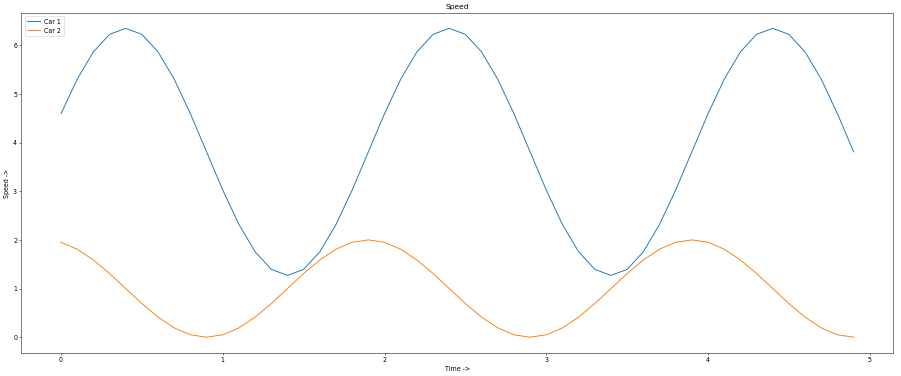

In [564]:
limit = 50 # limit is x number/percentage of values are shown, all is len(car1_speeds)
plt = figure(figsize=(25, 10), dpi= 45).gca() # initiate figure in notebook /matplotlib inline
plt.set_title('Speed')
plt.set_xlabel('Time ->')
plt.set_ylabel('Speed ->')
plt.plot(time[:limit], car1_speeds[:limit], label='Car 1') # plot speed along time
plt.plot(time[:limit], car2_speeds[:limit], label='Car 2') # plot speed along time
plt.legend(loc='upper left')

__Botsing Berekening__

In [565]:
def get_collisions(p1, p2, p3):
    collision = []
    state = False
    if abs(p1 - p2) <= 2:
        collision.append(["Car 1","Car 2"])
        state = True
    if abs(p2 - p3) <= 2:
        collision.append(["Car 2","Car 3"])
        state = True
    if abs(p3 - p1) <= 2:
        collision.append(["Car 3","Car 1"])
        state = True
    return state, collision

In [566]:
time , car1_speeds , car2_speeds, car3_speeds = [] , [] , [], []
csv = open('verkeerssimulatie-rechteweg-snelheden.csv', 'r') # open csv file
for row in csv: # iterate over csv file to save all values from the columns into lists
    time.append(float(row.split(";")[0])) # first column is time
    car1_speeds.append(float(row.split(";")[1])) # second column speed
    car2_speeds.append(float(row.split(";")[2])) # third column speed
    car3_speeds.append(float(row.split(";")[3])) # fourth column speed
csv.close() 

In [567]:
position1 = car1_speeds[0] # first row are position values
position2 = car2_speeds[0] # first row are position values
position3 = car3_speeds[0] # first row are position values
speed1 = car1_speeds[1] # save first speed value
speed2 = car2_speeds[1] # save first speed value
speed3 = car3_speeds[1] # save first speed value
time.remove(0) # remove first value from row with position instead of speed values

In [568]:
car1_positions, car2_positions, car3_positions = [position1], [position2], [position3]
collisions = {}
for i in range(2, len(time)):
    newposition1 = position1 + (speed1 * 0.1) # add previous position to calculated distance
    newposition2 = position2 + (speed2 * 0.1) # add previous position to calculated distance
    newposition3 = position3 + (speed3 * 0.1) # add previous position to calculated distance
                                 
    car1_positions.append(newposition1) # add position to list
    car2_positions.append(newposition2) # add position to list
    car3_positions.append(newposition3) # add position to list
    
    position1 = newposition1 # save current position as 'last position'
    position2 = newposition2 # save current position as 'last position'
    position3 = newposition3 # save current position as 'last position'
    
    speed1 = car1_speeds[i] # get next speed
    speed2 = car2_speeds[i] # get next speed
    speed3 = car3_speeds[i] # get next speed
    
    check_collision = get_collisions(position1, position2, position3)
    if check_collision[0]:
        collisions["Time: "+str(time[i])] = check_collision[1]

In [569]:
print("Collisions:\n")
for i in collisions:
    print(i, collisions[i],'\n')

Collisions:

Time: 0.4 [['Car 3', 'Car 1']] 

Time: 0.5 [['Car 3', 'Car 1']] 

Time: 0.6 [['Car 3', 'Car 1']] 

Time: 0.7 [['Car 3', 'Car 1']] 

Time: 0.8 [['Car 3', 'Car 1']] 

Time: 0.9 [['Car 3', 'Car 1']] 

Time: 1.0 [['Car 3', 'Car 1']] 



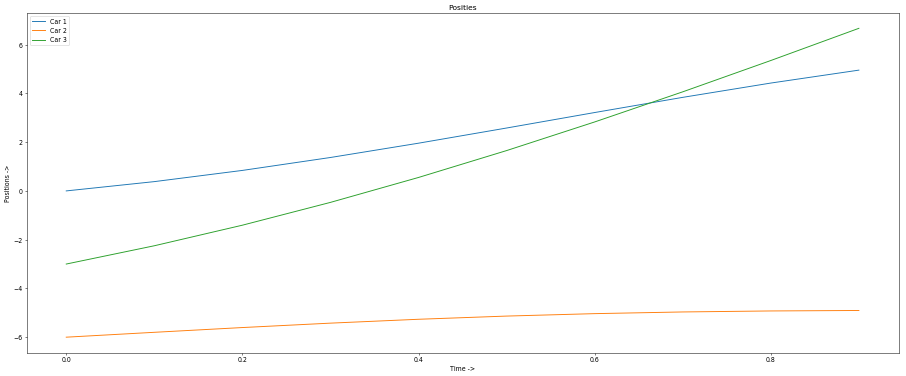

In [570]:
limit = 10 # limit is x number/percentage of values are shown, all is len(car1_positions)
plt = figure(figsize=(25, 10), dpi= 45).gca() # initiate figure in notebook /matplotlib inline
plt.set_title('Posities')
plt.set_xlabel('Time ->')
plt.set_ylabel('Positions ->')
plt.plot(time[:limit], car1_positions[:limit], label='Car 1') # plot positions along time for length limit
plt.plot(time[:limit], car2_positions[:limit], label='Car 2') # plot positions along time for length limit
plt.plot(time[:limit], car3_positions[:limit], label='Car 3') # plot positions along time for length limit
plt.legend(loc='upper left')